## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization,Dense,Activation

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
        else:
            x = Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

BATCH_SIZE=32
EPOCHS=50
LEARNING_RATE=1e-2
MOMENTUM=0.95

#### 1.試比較 save_best_only 與否的差異

In [ ]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

ml_ckpt=ModelCheckpoint(filepath="./tmp.h5",
                   monitor="val_loss",
                   save_best_only=False)
model=build_mlp(x_train.shape[1:])
opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    
model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,
         validation_data=(x_test,y_test),shuffle=True,
         callbacks=[ml_ckpt])
    
    

In [10]:
results={}
results['model']=model.history.history
model_check=keras.models.load_model('./tmp.h5')
results['model_check']=model_check.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 116us/step


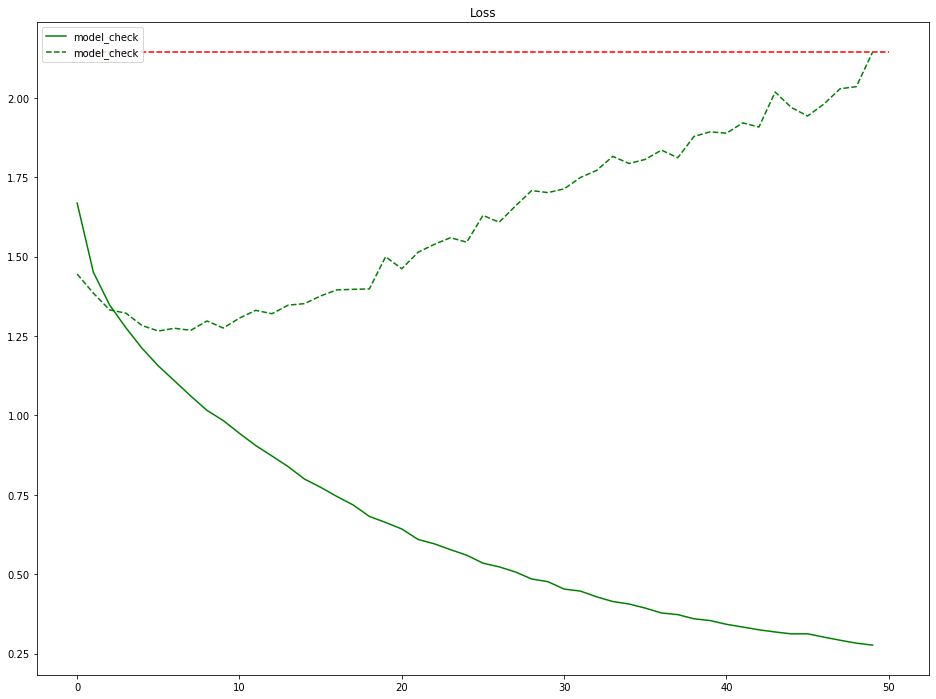

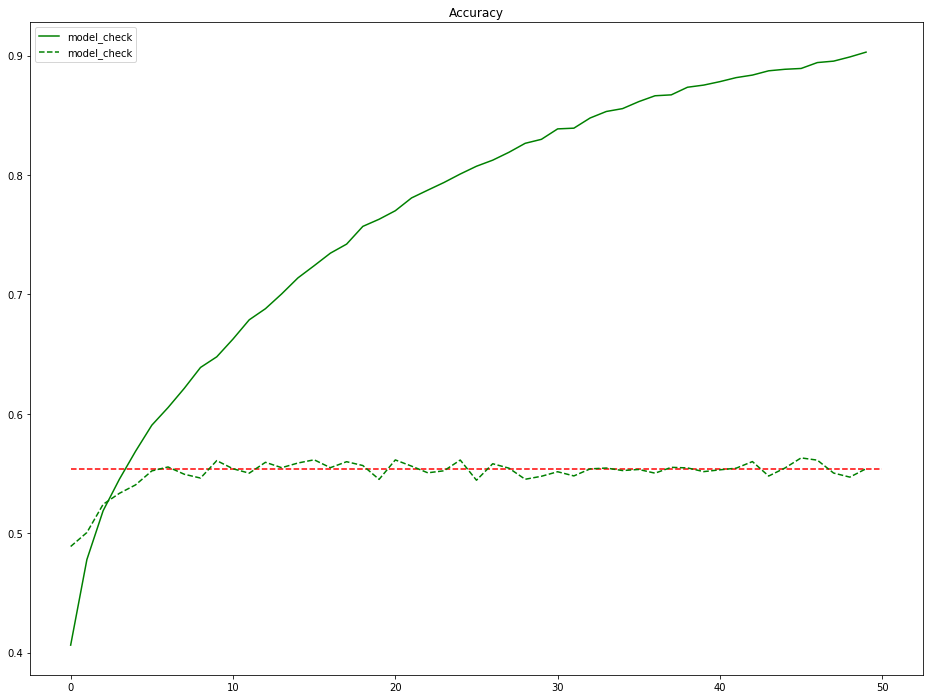

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))

plt.plot(range(len(results['model']['loss'])),results['model']['loss'], '-', label=con, color="g")
plt.plot(range(len(results['model']['val_loss'])),results['model']['val_loss'], '--', label=con, color="g")
plt.hlines(y=results["model_check"][0], xmin=0, xmax=len(results["model"]['val_loss']), colors='r', linestyles='--')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
plt.plot(range(len(results['model']['acc'])),results['model']['acc'], '-', label=con, color="g")
plt.plot(range(len(results['model']['val_acc'])),results['model']['val_acc'], '--', label=con, color="g")
plt.hlines(y=results["model_check"][1], xmin=0, xmax=len(results["model"]['val_acc']), colors='r', linestyles='--')
plt.title('Accuracy')
plt.legend()
plt.show()

#### 2.請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [16]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

keras.backend.clear_session()
ml_ckpt=ModelCheckpoint(filepath="./tmp.h5",
                   monitor="val_loss",
                   save_best_only=True,
                   save_weights_only=True)

model=build_mlp(x_train.shape[1:])
opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
    
model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,
         validation_data=(x_test,y_test),shuffle=True,
         callbacks=[ml_ckpt])
    
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 26s 513us/step - loss: 1.6744 - acc: 0.4020 - val_loss: 1.4667 - val_acc: 0.4750
Epoch 2/50
50000/50000 [==============================] - 25s 500us/step - loss: 1.4566 - acc: 0.4800 - val_loss: 1.3859 - val_acc: 0.5055
Epoch 3/50
50000/50000 [==============================] - 26s 519us/step - loss: 1.3492 - acc: 0.5193 - val_loss: 1.3388 - val_acc: 0.5190
Epoch 4/50
50000/50000 [==============================] - 27s 546us/step - loss: 1.2760 - acc: 0.5460 - val_loss: 1.2945 - val_acc: 0.5387
Epoch 5/50
50000/50000 [==============================] - 27s 531us/step - loss: 1.2162 - acc: 0.5666 - val_loss: 1.3071 - val_acc: 0.5342
Epoch 6/50
50000/50000 [==============================] - 26s 522us/step - loss: 1.1624 - acc: 0.5864 - val_loss: 1.2754 - val_acc: 0.5460
Epoch 7/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.1147 - acc: 0.6025 - val_loss: 1.

In [17]:
model2=build_mlp(x_train.shape[1:])
opt=keras.optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM,nesterov=True)
model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

model2.load_weights("./tmp.h5")

y_pred = model2.predict(x_test)

In [18]:
y_pred

array([[2.45377123e-02, 2.21851636e-02, 1.32281929e-01, ...,
        9.83601785e-04, 2.34531239e-02, 6.79054856e-03],
       [1.79100521e-02, 1.75768789e-02, 1.39560062e-03, ...,
        7.20626776e-05, 7.91026711e-01, 1.69274956e-01],
       [6.46105766e-01, 7.09220171e-02, 1.40732508e-02, ...,
        8.17612652e-03, 1.88804507e-01, 4.67675813e-02],
       ...,
       [3.82497273e-02, 9.46842600e-04, 1.79575965e-01, ...,
        4.28146161e-02, 1.52242435e-02, 3.20640043e-03],
       [1.25040755e-01, 3.85361686e-02, 5.70991300e-02, ...,
        4.78851832e-02, 2.20966160e-01, 3.02540101e-02],
       [1.76014397e-02, 1.38539844e-03, 4.36355621e-02, ...,
        5.73548734e-01, 3.97018204e-03, 1.00359134e-02]], dtype=float32)